In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#READ CSV FILE

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

fashion_mnist



4422102/4422102 [==============================] - 0s 0us/step


<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [2]:
X_train, X_test = X_train / 255.0, X_test / 255.0


class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [3]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=60, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=120, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(180, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [4]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        300       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 60)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 60)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 120)       28920     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 120)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 120)         0

In [5]:
#CREATE MLP MODEL

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




In [6]:
#EVALUATE THE MODEL

model.fit(X_train, y_train, epochs=10, validation_split=0.2)



Epoch 1/10
1500/1500 [==============================] - 125s 83ms/step - loss: 0.5475 - accuracy: 0.8017 - val_loss: 0.3714 - val_accuracy: 0.8660
Epoch 2/10
1500/1500 [==============================] - 113s 75ms/step - loss: 0.3848 - accuracy: 0.8612 - val_loss: 0.3016 - val_accuracy: 0.8896
Epoch 3/10
1500/1500 [==============================] - 119s 79ms/step - loss: 0.3378 - accuracy: 0.8788 - val_loss: 0.2804 - val_accuracy: 0.8963
Epoch 4/10
1500/1500 [==============================] - 113s 75ms/step - loss: 0.3110 - accuracy: 0.8867 - val_loss: 0.2521 - val_accuracy: 0.9081
Epoch 5/10
1500/1500 [==============================] - 117s 78ms/step - loss: 0.2913 - accuracy: 0.8924 - val_loss: 0.2402 - val_accuracy: 0.9116
Epoch 6/10
1500/1500 [==============================] - 112s 75ms/step - loss: 0.2722 - accuracy: 0.9009 - val_loss: 0.2311 - val_accuracy: 0.9163
Epoch 7/10
1500/1500 [==============================] - 122s 81ms/step - loss: 0.2637 - accuracy: 0.9017 - val_loss: 0

In [7]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test accuracy:', score[1])


Test accuracy: 0.9146000146865845


In [9]:
from numpy import asarray
from numpy import unique
from numpy import argmax

image = X_test[0]
result = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(result))


1/1 [==============================] - 0s 111ms/step
Predicted: class=9


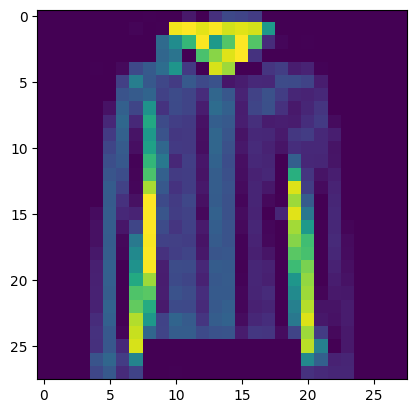

In [13]:
plt.imshow(X_test[6])
